In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

---
### 1 - Select Periods - Build Graph

In [2]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2007')

# Load data from a JSONL file
market = Market.loader('2007/03/01','2007/04/01', data_path)

100%|██████████| 46/46 [07:03<00:00,  9.20s/it]


In [3]:
# Get periods of length 15
periods = market.get_periods_fast(period_length=1800)
print(f"Number of periods: {len(periods)}")

100%|██████████| 8577796/8577796 [07:22<00:00, 19390.10it/s]


Number of periods: 351


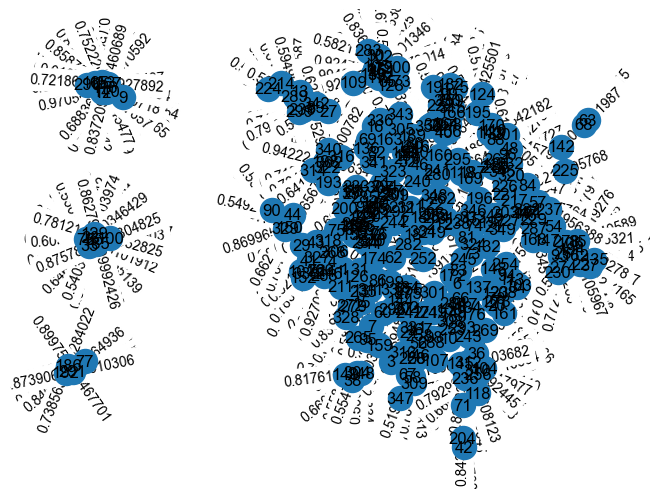

In [ ]:
# Build the graph
state_graph_s = market.build_graph(periods, threshold=0.5, inter=True, filter_type='s')
state_graph_g = market.build_graph(periods, threshold=0.5, inter=True, filter_type='g')
state_graph_delta = market.build_graph(periods, threshold=0.5, inter=True, filter_type='delta')

---
### 2 - Clustering

### 2.1 - Louvain Clustering

Filter type: s
Number of nodes: 341
Number of edges: 1092
Number of periods: 351
Number of clusters: 23
Cluster sizes: [20, 19, 23, 22, 8, 18, 10, 28, 15, 20, 10, 7, 16, 19, 9, 10, 9, 4, 24, 13, 30, 5, 0]
Transition matrix: 
[[0.1        0.05       0.05       0.1        0.1        0.05
  0.         0.2        0.05       0.05       0.05       0.
  0.         0.05       0.         0.         0.         0.
  0.05       0.         0.05       0.         0.05      ]
 [0.         0.         0.05263158 0.05263158 0.         0.
  0.         0.10526316 0.05263158 0.15789474 0.         0.
  0.05263158 0.05263158 0.         0.05263158 0.         0.
  0.21052632 0.         0.15789474 0.05263158 0.        ]
 [0.04347826 0.04347826 0.08695652 0.         0.04347826 0.
  0.08695652 0.08695652 0.04347826 0.04347826 0.         0.04347826
  0.         0.04347826 0.         0.04347826 0.04347826 0.
  0.17391304 0.08695652 0.08695652 0.         0.        ]
 [0.         0.         0.         0.09090909 0.   

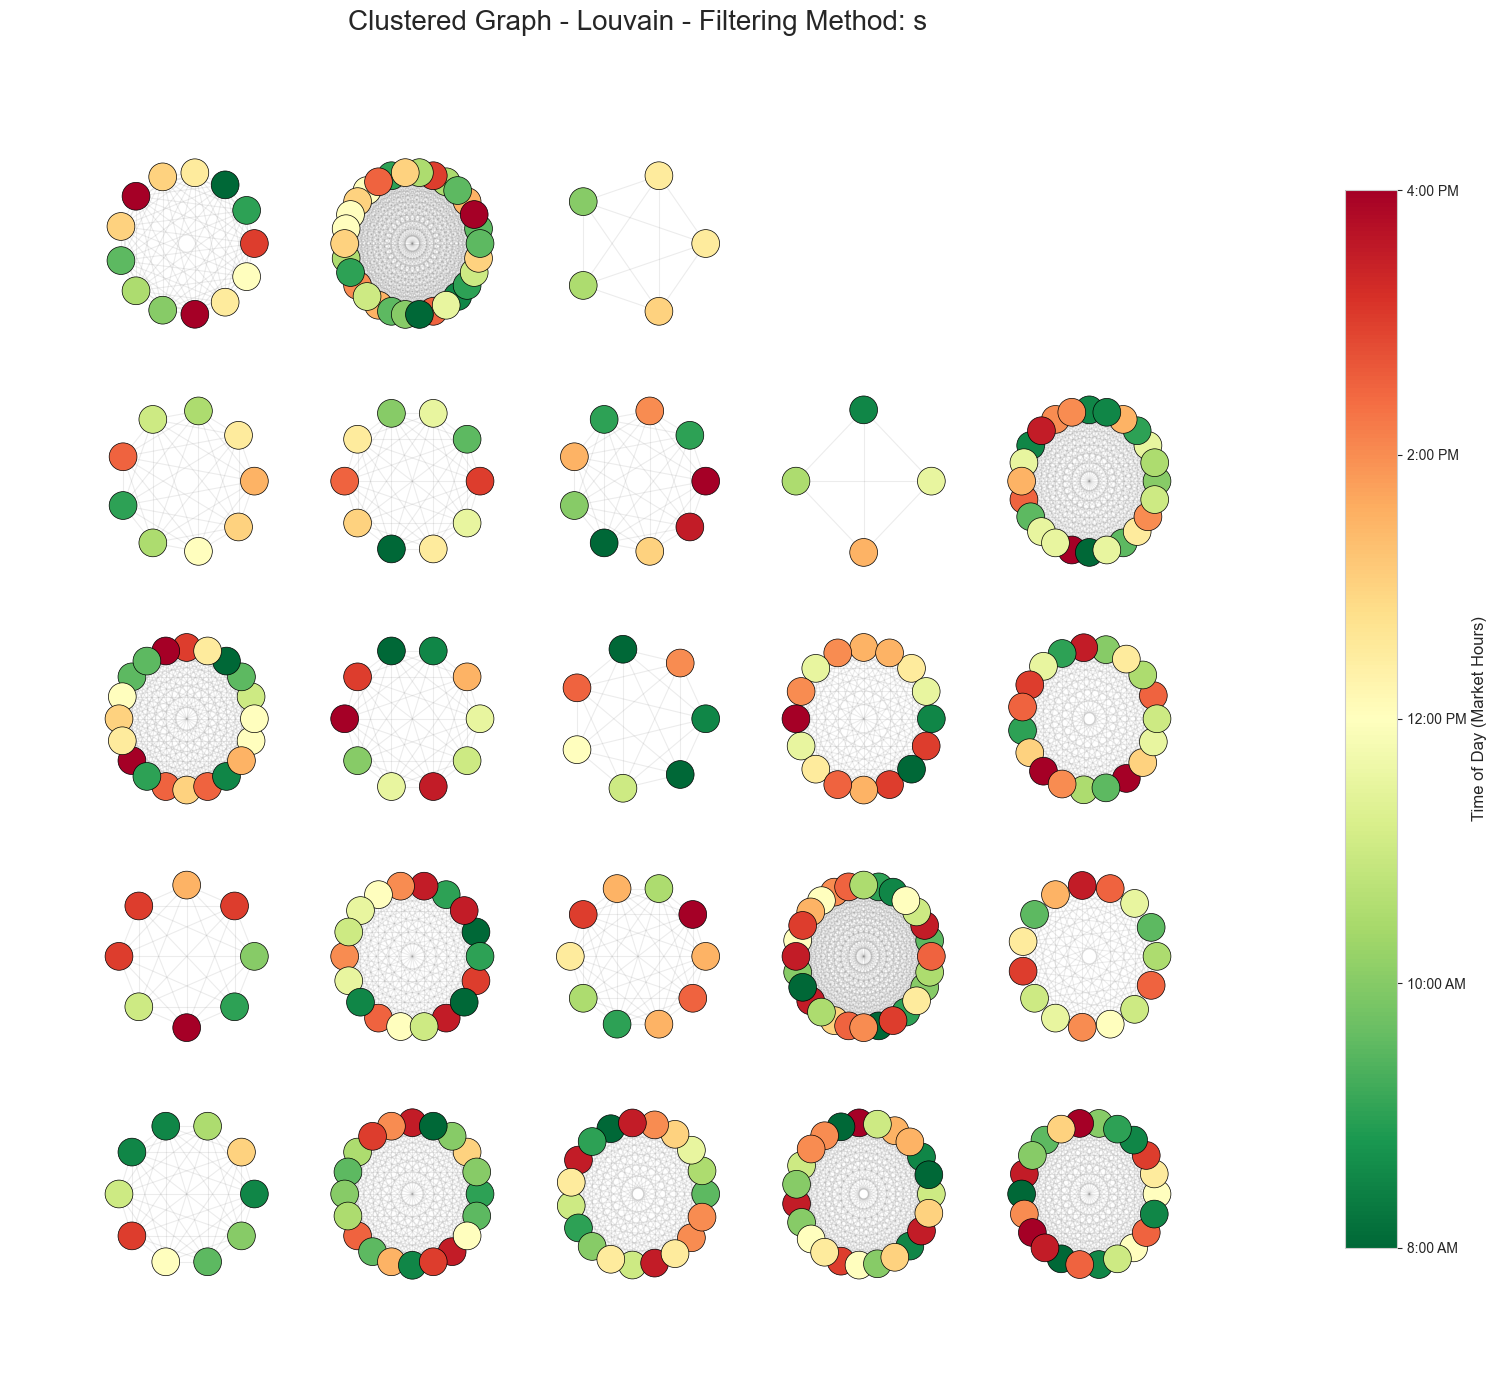

Clusters 

In [ ]:
graphs = {
    's': state_graph_s,
    'g': state_graph_g,
    'delta': state_graph_delta
}

for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = LouvainClustering().fit(periods, G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_cluster_2(method=f'Louvain - Filtering Method: {filter_type}')
    clustering.plot_ssv()

### 2.2 - Greedy Clustering

Filter type: s
Number of nodes: 341
Number of edges: 1092
Number of periods: 351
Number of clusters: 22
Cluster sizes: [37, 34, 32, 31, 26, 22, 20, 18, 16, 16, 12, 11, 11, 10, 9, 8, 7, 7, 5, 4, 4, 0]
Transition matrix: 
[[0.13513514 0.16216216 0.10810811 0.05405405 0.         0.05405405
  0.05405405 0.08108108 0.02702703 0.05405405 0.02702703 0.02702703
  0.05405405 0.02702703 0.         0.         0.02702703 0.08108108
  0.         0.02702703 0.         0.        ]
 [0.05882353 0.05882353 0.08823529 0.05882353 0.02941176 0.08823529
  0.05882353 0.14705882 0.05882353 0.02941176 0.02941176 0.02941176
  0.05882353 0.05882353 0.02941176 0.02941176 0.02941176 0.
  0.02941176 0.         0.02941176 0.        ]
 [0.09375    0.09375    0.09375    0.125      0.0625     0.03125
  0.0625     0.         0.03125    0.125      0.03125    0.03125
  0.         0.         0.         0.0625     0.03125    0.
  0.03125    0.         0.03125    0.0625    ]
 [0.12903226 0.03225806 0.12903226 0.03225806 0.0

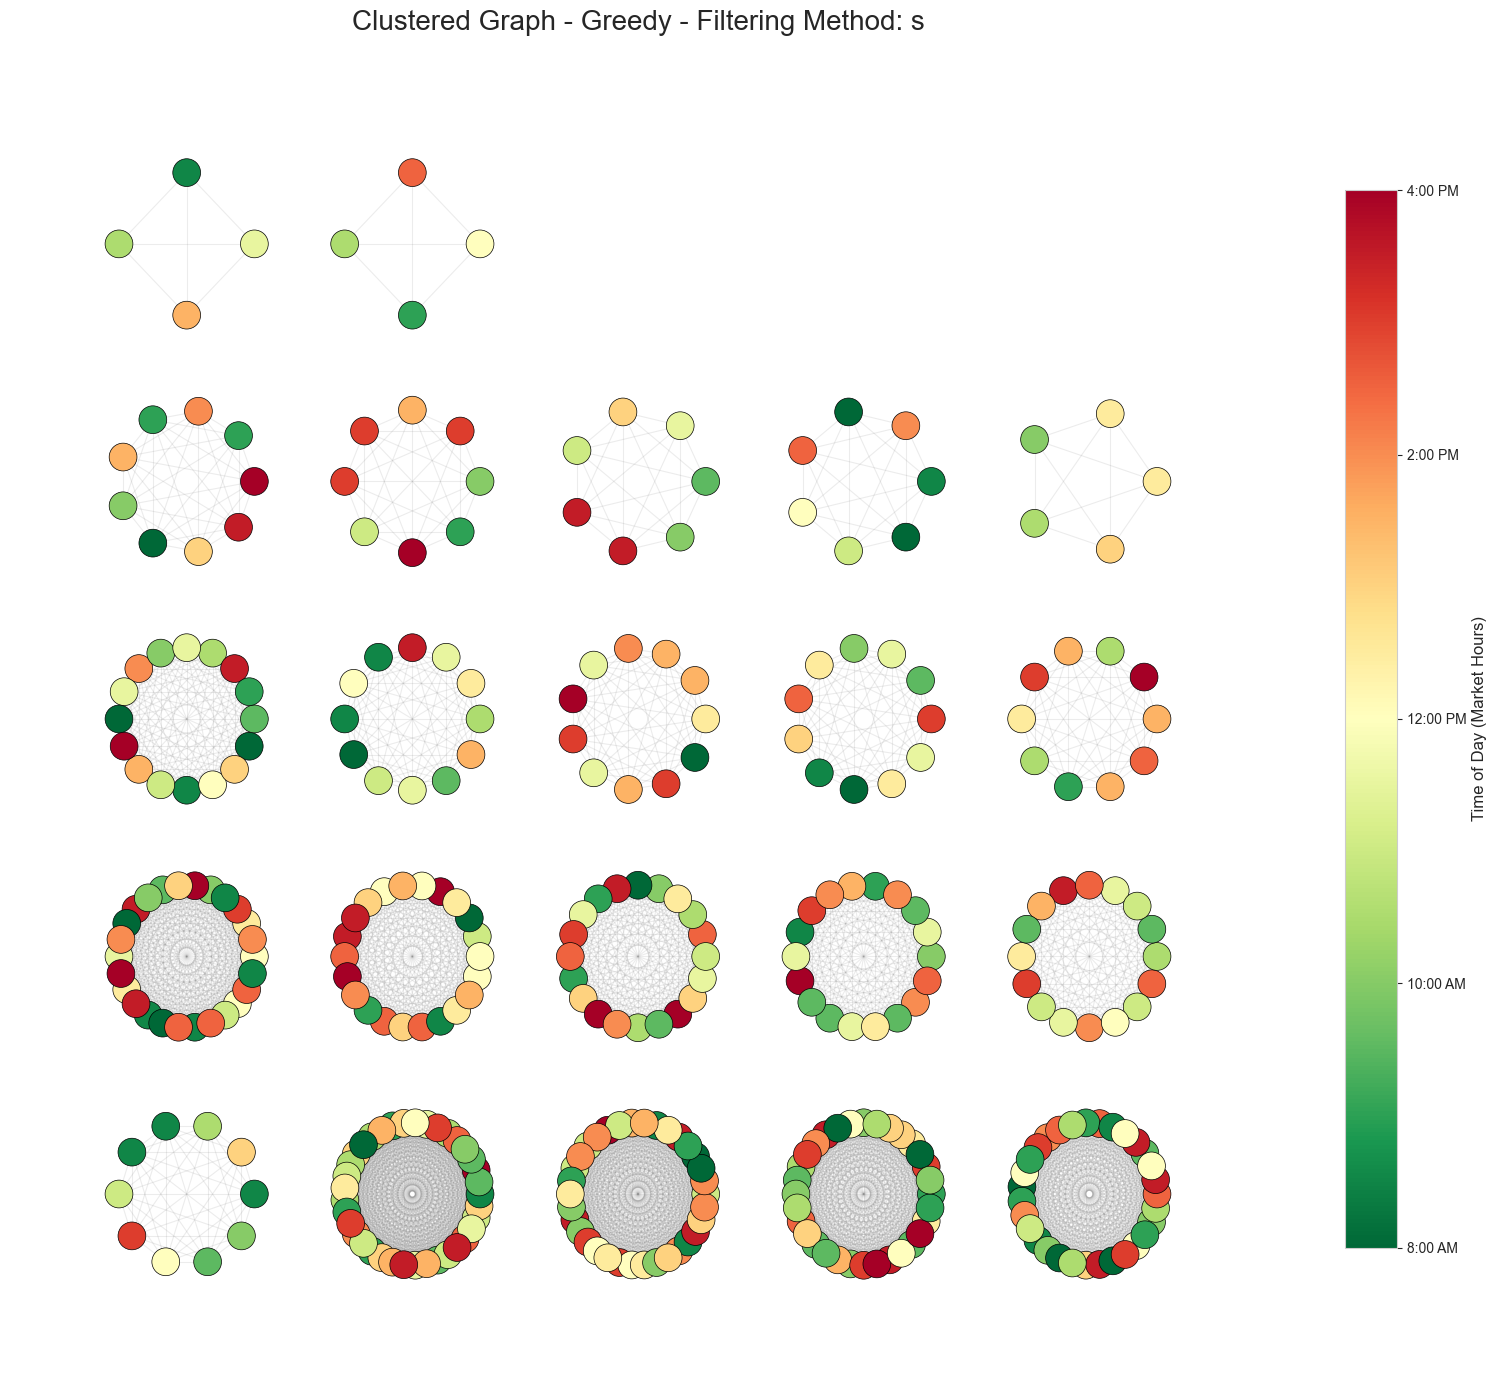

Filter type: g
Number of nodes: 342
Number of edges: 1094
Number of periods: 351
Number of clusters: 23
Cluster sizes: [37, 33, 31, 30, 22, 22, 22, 19, 16, 16, 12, 12, 11, 10, 9, 9, 8, 7, 5, 4, 4, 2, 0]
Transition matrix: 
[[0.13513514 0.16216216 0.10810811 0.05405405 0.05405405 0.05405405
  0.08108108 0.02702703 0.02702703 0.         0.02702703 0.02702703
  0.05405405 0.02702703 0.         0.05405405 0.         0.08108108
  0.         0.02702703 0.         0.         0.        ]
 [0.06060606 0.06060606 0.06060606 0.09090909 0.06060606 0.06060606
  0.18181818 0.06060606 0.06060606 0.03030303 0.03030303 0.03030303
  0.03030303 0.03030303 0.03030303 0.03030303 0.03030303 0.
  0.03030303 0.         0.         0.         0.03030303]
 [0.09677419 0.12903226 0.09677419 0.12903226 0.12903226 0.03225806
  0.03225806 0.03225806 0.03225806 0.06451613 0.03225806 0.06451613
  0.         0.         0.         0.03225806 0.06451613 0.
  0.         0.         0.03225806 0.         0.        ]
 [0.1  

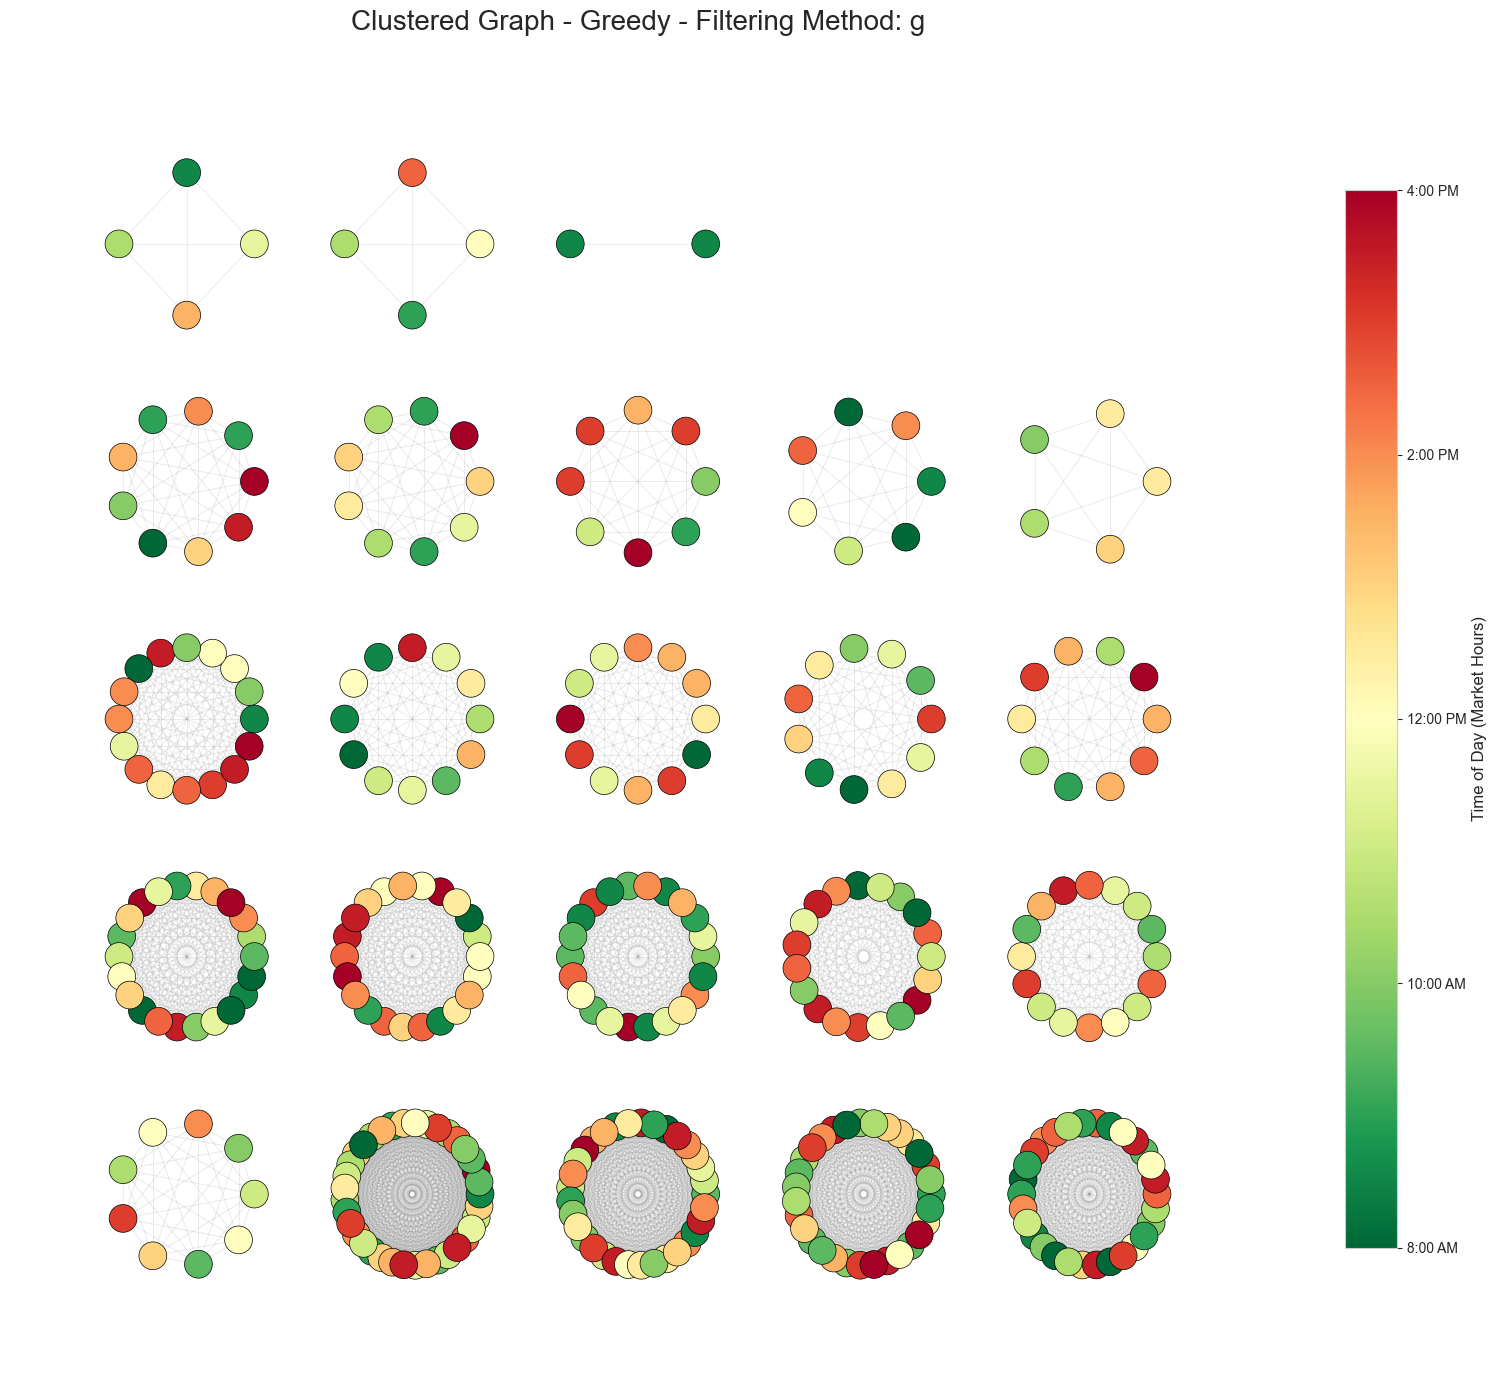

Filter type: delta
Number of nodes: 325
Number of edges: 912
Number of periods: 351
Number of clusters: 24
Cluster sizes: [40, 33, 31, 30, 21, 22, 17, 14, 11, 11, 11, 11, 10, 9, 8, 8, 8, 7, 6, 5, 4, 4, 3, 0]
Transition matrix: 
[[0.15       0.         0.075      0.1        0.1        0.125
  0.025      0.075      0.075      0.05       0.05       0.
  0.025      0.         0.         0.         0.025      0.
  0.         0.025      0.         0.         0.         0.1       ]
 [0.09090909 0.09090909 0.12121212 0.06060606 0.06060606 0.18181818
  0.03030303 0.06060606 0.03030303 0.03030303 0.03030303 0.
  0.03030303 0.03030303 0.03030303 0.         0.03030303 0.
  0.03030303 0.         0.         0.         0.         0.06060606]
 [0.03225806 0.09677419 0.06451613 0.16129032 0.03225806 0.09677419
  0.         0.03225806 0.06451613 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.         0.06451613 0.         0.06451613
  0.03225806 0.03225806 0.         0.03225806 0.         0.

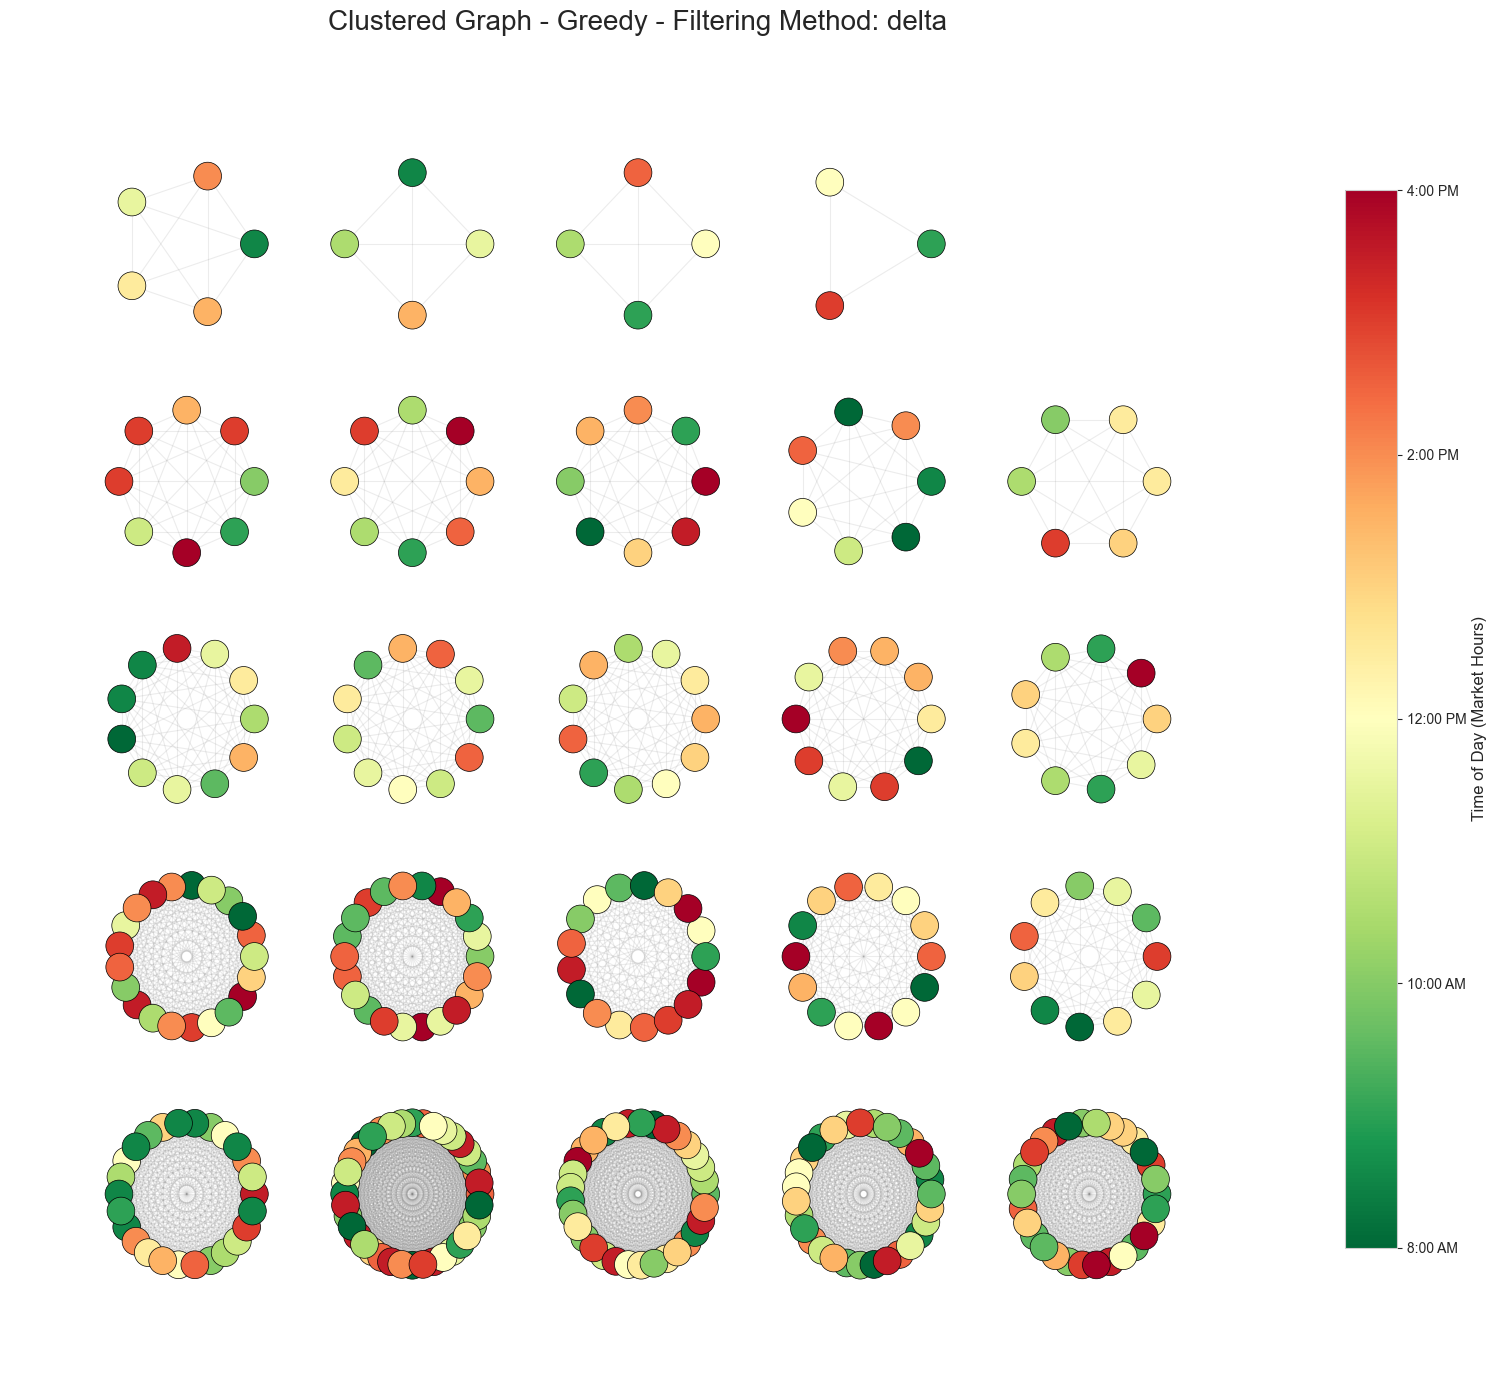

In [73]:
for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = GreedyClustering().fit(periods,  G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_cluster_2(method=f'Greedy - Filtering Method: {filter_type}')
    # clustering.plot_ssv()